# Install libraries:

In [ ]:
#importing libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from zipfile import ZipFile
import json
# -*- coding: utf-8 -*-

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing processed brand names through NLP
brandsprocessed3 = pd.read_csv('drive/Shareddrives/capstone_prayap_nithyara/brandslistfinal_data.csv')
brandsprocessed=list(brandsprocessed3['0'])

['the original dessert hummus',
 'liketoknowit',
 'jofama  fashion',
 'opullence paris',
 'hellobody italia',
 'keep nature wild',
 'littlewoods',
 'mary kay de mxico oficial',
 'the may fair',
 'evogue']

#Model data preprocessing

##READ DATA

In [ ]:
#read influencer data
df=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/sponsored_brand_mentions_by_influencer_merge.csv')

In [ ]:
#read captions data
df1=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/post_captions_combined.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Preprocessing


**Preprocessing model data.**

##DONT RUN ONLY FOR DATA

In [ ]:
#Linear Regression Model 
#The problem can be formulated as a regression task, with the goal of estimating popularity 
#as the ratio between expected likes and comments over number of media and number of months
#Input requires the following
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. npos=Number of Posts from df
#4. nsbmp=Number of Sponsored Posts from df
#5. nc=total number of comments by account
#6. ne=total emojis from df4
#7. nh=total hashtags from df5
#8. nbmp= total brand mentioning posts
#9. acl=average caption length
#10.nm=number of media
#11. url = has url or not 0 or 1

#Follower growth fgr= (af1-af0)/duration in months  can we get this from the dataset we have
#popularity growth pgr= (pl+nc)/(nm*duration in months)


In [ ]:
combineddf=pd.read_csv("/content/drive/Shareddrives/capstone_prayap_nithyara/influencers_posts_sentiment_emoji_hashtag.csv")

In [ ]:
df3=combineddf.groupby('Account ID_x')['Caption Length'].agg('mean')

In [ ]:
df3=pd.DataFrame(df3)

In [ ]:
df3.columns

Index(['Caption Length'], dtype='object')

In [ ]:
from collections import Counter


In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 175 kB 22.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=4b2313e0f5c73b307eb2ae28703216c2e0db4446a384b1847f41155b37d981f6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji

In [ ]:
from typing import Dict
combineddf['total_emoji']=combineddf['emoji'].apply(lambda x: len(''.join(c for c in x if c in emoji.UNICODE_EMOJI['en'])))

In [ ]:
df4=combineddf.groupby('Account ID_x')[['total_hashtags','total_emoji']].agg('sum')

In [ ]:
df4['Caption Length']=df3['Caption Length']

In [ ]:
df4.reset_index(inplace=True)

In [ ]:
df4=df4.rename(columns={'Account ID_x':'Account ID'})

In [ ]:
df5=pd.merge(df,df4,on='Account ID')

In [ ]:
df6=df5[['Account ID','Name','Followers','Posts','Category','Brand Mentioning Posts','Sponsored Brand Mentioning Posts','total_hashtags','total_emoji','Caption Length']]

In [ ]:
df7=pd.read_csv("/content/drive/Shareddrives/capstone_prayap_nithyara/models/all_like_comments.csv")

In [ ]:
df8=df7.groupby('Account ID')[['Like','Comments']].agg('sum')

In [ ]:
df9=pd.merge(df6,df8,on='Account ID')

In [ ]:
df9.to_csv( "account_model.csv", index=False, encoding='utf-8-sig')
!cp account_model.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"

In [ ]:
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/account_model.csv')

In [ ]:
textdf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/influencers_posts_sentiment_emoji_hashtag_cleantext.csv')

In [ ]:
merge=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/influencer_brand_category.csv')

In [ ]:
merge1=merge.groupby('Brand')['Influencer'].apply(list).reset_index()

In [ ]:
merge1['tot_inf']=merge1['Influencer'].apply(lambda x: len(x))

In [ ]:
merge1.sort_values(by='tot_inf',ascending=False,inplace=True)

In [ ]:
merge2=merge1

In [ ]:
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/model_input.csv')

In [ ]:
merge2.reset_index(inplace=True)

In [ ]:
merge2['Influencer'][0]

In [ ]:
merge2['pgr']=0
k=0
for i in merge2['Influencer']:
  total=0
  for j in i:
    try:
      total=total+int(modeldf[modeldf['Account ID']==j]['pgr'])
    except:
      total=total
  pgr=total
  merge2['pgr'].iloc[k]=pgr
  k=k+1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
merge4=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/brand_mention_merge.csv')

In [ ]:
merge4.rename(columns={'Account ID':"Brand"},inplace=True)

In [ ]:
merge7=merge4[['Brand','Followers','Followees','Posts','count']]

In [ ]:
merge7.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
merge5=pd.merge(merge7,merge2, on= "Brand")

In [ ]:
merge5.dropna(inplace=True)

In [ ]:
merge5.rename(columns={'count':'bc'},inplace=True)
#merge5.drop(columns='index',inplace=True)

In [ ]:
merge5.to_csv( "brandmodel_input.csv", index=False, encoding='utf-8-sig')
!cp brandmodel_input.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"

(array([1.7015e+04, 2.8400e+02, 5.7000e+01, 2.3000e+01, 1.5000e+01,
        7.0000e+00, 6.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

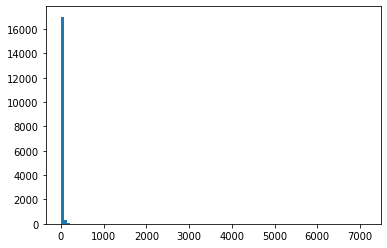

In [ ]:
import matplotlib.pyplot as plt
plt.hist(merge5['tot_inf'],bins=500)

In [ ]:
modeldf=modeldf.fillna(0)

In [ ]:
#1. af=account followers from df
#2. pl=likes of all posts by the account
#3. npos=Number of Posts from df
#4. nsbmp=Number of Sponsored Posts from df
#5. nc=total number of comments by account
#6. ne=total emojis from df4
#7. nh=total hashtags from df5
#8. nbmp= total brand mentioning posts
#9. acl=average caption length
#10.nm=number of media
#11. url = has url or not 0 or 1

#Follower growth fgr= (af1-af0)/duration in months  can we get this from the dataset we have
#popularity pgr= (pl+nc)/(nm*duration in months)
modeldf=modeldf.rename(columns={'Followers':'af','Posts':'npos','Brand Mentioning Posts':'nbmp','Sponsored Brand Mentioning Posts':'nspos','total_emoji':'ne','total_hashtags':'nh','Caption Length':'acl','Like':'pl','Comments':'nc'})

In [ ]:
model2df=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/all_media_url.csv')

In [ ]:
model2df['url']=model2df['url'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
model2df1=model2df.groupby('Account ID')[['media','url']].agg('sum')

In [ ]:
model2df1=model2df1.fillna(0)

In [ ]:
model2df1['nm']=model2df1['media'].apply(lambda x: 1 if x==0 else x)

In [ ]:
modeldf1=pd.merge(modeldf,model2df1,on='Account ID')

In [ ]:
modeldf=pd.read_csv('/content/drive/Shareddrives/capstone_prayap_nithyara/models/model_input.csv')

In [ ]:
modeldf['nm']=modeldf1['nm']
modeldf['url']=modeldf1['url']

In [ ]:
modeldf['pgr']=(modeldf['pl']+modeldf['nc'])/(modeldf['nm']*3)

In [ ]:
#EXPORTING INFLUENCER DATASET TO THE FOLDER BEFORE RUNNING MODELS
modeldf.to_csv( "model_input.csv", index=False, encoding='utf-8-sig')
!cp model_input.csv "/content/drive/Shareddrives/capstone_prayap_nithyara/models"